<a id='intro'></a>
<p><h3> Introduction</h3></p>
>**Dataset** This dataset collects information from the 1990 California census data. It contains one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).<br><br>
>**Objective** of this project is to predict the housing prices using suitable ML alrorithm

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
read_housing=pd.read_csv('C:/Users/rchak/Desktop/california/housing.csv')
housing=pd.DataFrame(read_housing)

>**Digging** more into the data

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B9F0400>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1A34A8>]], dtype=object)

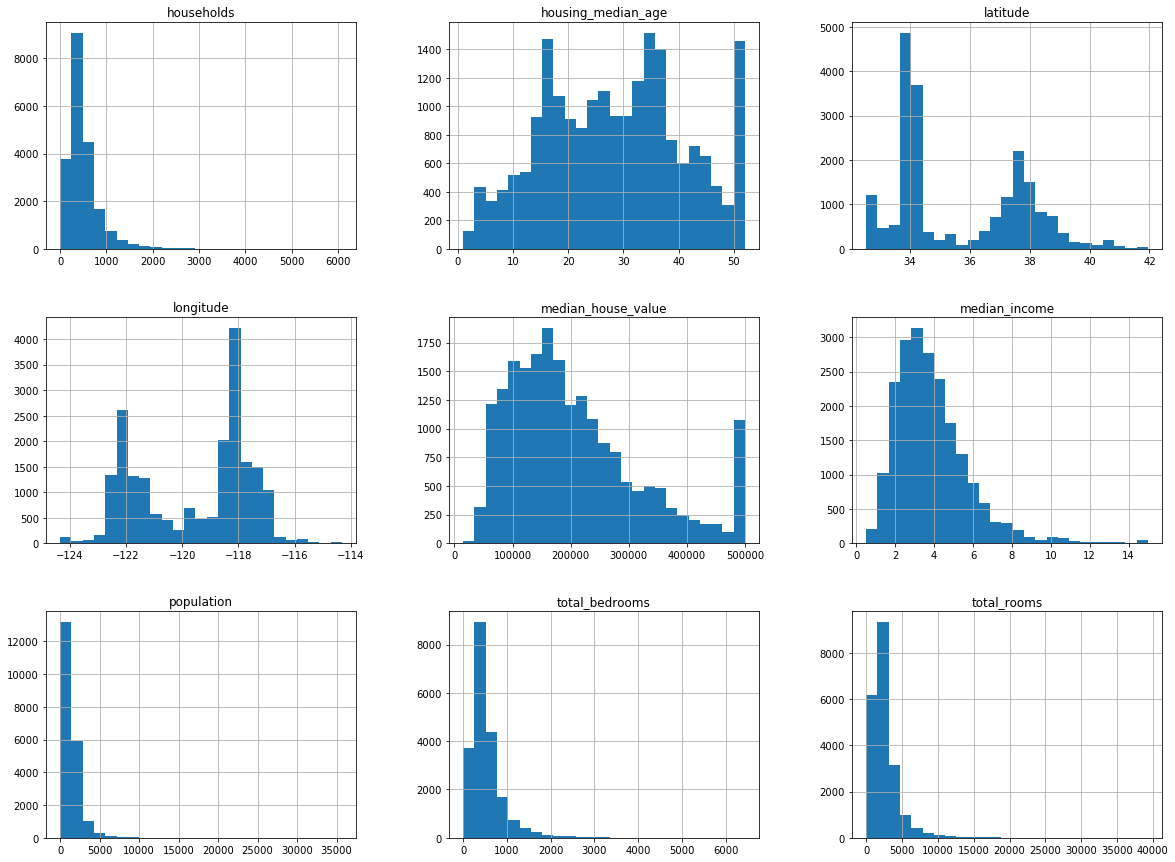

In [5]:
housing.hist(bins=25,figsize=(20,15))

>From the above it can be found that the median_income is not in USD. It has been capped at 15 with 0.5 being the lowest median income groups and 15 being the hisgest median income groups. It can be seen from median income graph that, most incomes afre from 2-6 and some being above 6(maybe outliers). So it would be better to have a stratified classification, where all income groups are classifed from 1-5, where 1 is the lowest income group and 5 is the highest

In [6]:
housing['in_category']=np.ceil(housing['median_income']/1.5)
housing['in_category'].where(housing['in_category']<5,5,inplace=True)

In [7]:
housing['in_category'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: in_category, dtype: float64

>We are going to split the training and testing data using stratified shullfe split, available under scikit learn, it splits the data randomly and the splitting is stratified.(stratified splitting is based on 'in_category', so that the training and test data has same proposion of income categories).

In [9]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index, test_index in split.split(housing,housing['in_category']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [10]:
housing['in_category'].value_counts()/len(housing)

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: in_category, dtype: float64

In [11]:
for set in (strat_train_set,strat_test_set):
    set.drop(['in_category'],axis=1,inplace=True)

<p><h3>Exploration</h3></p>
>**Exploring the data set** to find more about the data and corelation of the parameters

In [12]:
house=strat_train_set.copy()

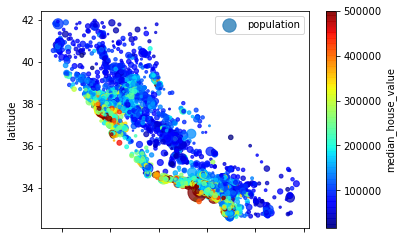

In [14]:
house.plot(kind='scatter',x='longitude',y='latitude',alpha=0.75,s=housing['population']/100,label='population',c='median_house_value',cmap=plt.get_cmap('jet'),colorbar=True)

>It can be seen that the houses near the ocean have high prices in central and southern california, whereas in northern california the housing prices are fairly same

C:\Users\rchak\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F1B0F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000010D8BA90>]], dtype=object)

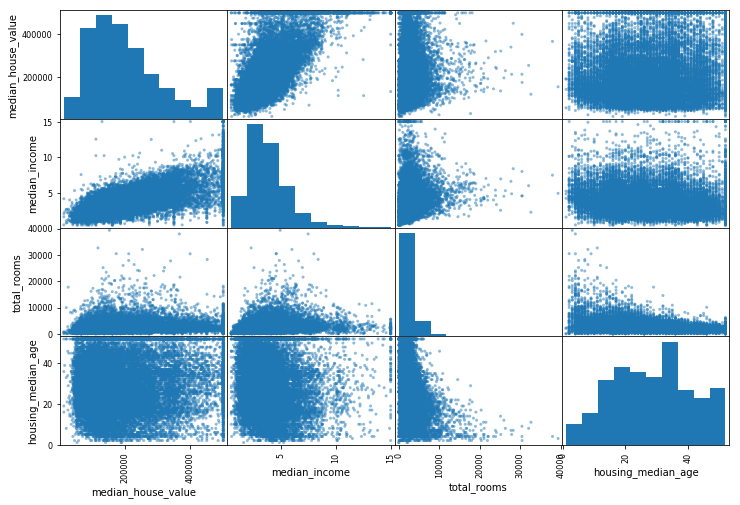

In [17]:
from pandas.tools.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes], figsize=(12,8))

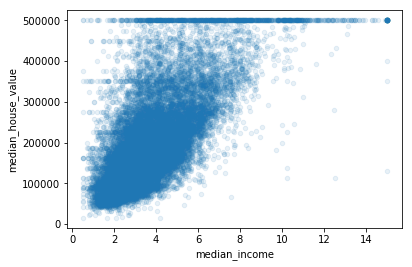

In [18]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1)

>The above two plotting is for finding the corelation between parameters, it is found that median_house_value has a very high positive corelation with median_income

In [19]:
housing['rooms_per_house']=housing['total_rooms']/housing['households']
housing['bedrooms_per_room']=housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household']=housing['population']/housing['households']

> The  ['rooms_per_house'], ['bedrooms_per_room'], ['population_per_household'] are some of the interesting parameters which may be used to improve predictions in future

In [21]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
in_category                 0.643892
rooms_per_house             0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

> the above is the corelation between parameters, obtained using the pearson's r concept. If the number is above 0, then there is a positive co-relation and when the number is below 0 then there is negative co-relation

<p><h3>**Preparing for ML**</h3></p>
>Now, the data is almost ready, but there are some more tweks to be done so that it can be used to learn using Machine Learning algorithms

In [22]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()


In [23]:
from sklearn.preprocessing import Imputer
imputer=Imputer(strategy='median')
housing_num=housing.drop('ocean_proximity',axis=1)

In [24]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

>Imputer is a package from scikit-learn, which is used to deal with missing values. The imputer will compute the median of the parameter anf replace the missing values with the median value. It can be used for whole dataset, as it doesnot change any present values

In [26]:
housing_num.median().values

array([ -118.51  ,    34.26  ,    29.    ,  2119.5   ,   433.    ,
        1164.    ,   408.    ,     3.5409])

In [27]:
x=imputer.transform(housing_num)

In [28]:
housing_tr=pd.DataFrame(x, columns=housing_num.columns)

In [29]:
from sklearn.preprocessing import LabelBinarizer
encoder=LabelBinarizer()
housing_cat=housing['ocean_proximity']
housing_cat_1hot=encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       ..., 
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0]])

>LabelBinarizer is a package under scikit-learn used to deal with text in the data set, here the 'ocean_proximity' is converted into 1 hot encoding so that it can be run smoothly under ML algorithms which are going to be used in future

**Custom Transform**

In [30]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix= 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self,add_bedrooms_per_room=True):
        self.add_bedrooms_per_room=add_bedrooms_per_room
    def fit(self,X,y=None):
        return self
    def transform(self,X,y=None):
        rooms_per_household=X[:,rooms_ix]/X[:,household_ix]
        population_per_household=X[:,population_ix]/X[:,household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:, bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder= CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform(housing.values)

**Transformation pipelines**

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline=Pipeline([
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])
housing_num_tr=num_pipeline.fit_transform(housing_num)

In [32]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names= attribute_names
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attribute_names].values

In [33]:
from sklearn.pipeline import FeatureUnion
num_attribs =list(housing_num)
cat_attribs=['ocean_proximity']

num_pipeline=Pipeline([
    ('selector',DataFrameSelector(num_attribs)),
    ('imputer',Imputer(strategy='median')),
    ('attribs_adder',CombinedAttributesAdder()),
    ('std_scaler',StandardScaler()),
])

cat_pipeline=Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer',LabelBinarizer()),
    
])

full_pipeline=FeatureUnion(transformer_list=[
    ('num_pipeline',num_pipeline),
    ('cat_pipeline',cat_pipeline),
])

In [34]:
housing_prepared=full_pipeline.fit_transform(housing)

> **The pipeline** starts with selector transformer, which selects the desired attributes and converts them into numpy arrays and dropping the rest<br>
>**The custom transforms** are for defining cutom cleanup and combination operations (fit(),transform())<br>
>**The Transformation pipelines** ensures the data transformational steps will be execued in the correct order

<p><h3>**Training and Evaluating using Machine Learning**</h3></p>
>Now that all the essential work to prepare the data for Machine Learning algorithm to run are completed.., it's time to run Machine Learning on the dataset

> Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
some_data=housing.iloc[:5]
some_labels=housing_labels.iloc[:5]
some_prepared=full_pipeline.transform(some_data)
print('Predictions:',lin_reg.predict(some_prepared))

('Predictions:', array([ 210644.60459286,  317768.80697211,  210956.43331178,
         59218.98886849,  189747.55849879]))


In [37]:
print('labels:',list(some_labels))

('labels:', [286600.0, 340600.0, 196900.0, 46300.0, 254500.0])


**finding error root mean square error**

In [38]:
from sklearn.metrics import mean_squared_error
housing_predictions=lin_reg.predict(housing_prepared)
lin_mse=mean_squared_error(housing_labels,housing_predictions)
lin_rmse=np.sqrt(lin_mse)
lin_rmse

68628.198198489219

>**random forest**

In [39]:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [40]:
print('Predictions:',forest_reg.predict(some_prepared))

('Predictions:', array([ 269960.,  322790.,  197180.,   53740.,  243520.]))


In [41]:
print('labels:',list(some_labels))

('labels:', [286600.0, 340600.0, 196900.0, 46300.0, 254500.0])


In [42]:
from sklearn.metrics import mean_squared_error
for_predictions=forest_reg.predict(housing_prepared)
for_mse=mean_squared_error(housing_labels,for_predictions)
for_rmse=np.sqrt(for_mse)
for_rmse

22155.037176617345

>**Decision Tree Regressor**

In [43]:
from sklearn.tree import DecisionTreeRegressor
tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [44]:
print('Predictions:',tree_reg.predict(some_prepared))

('Predictions:', array([ 286600.,  340600.,  196900.,   46300.,  254500.]))


In [45]:
print('labels:',list(some_labels))

('labels:', [286600.0, 340600.0, 196900.0, 46300.0, 254500.0])


In [46]:
tre_predictions=tree_reg.predict(housing_prepared)
tre_mse=mean_squared_error(housing_labels,tre_predictions)
tre_rmse=np.sqrt(tre_mse)
tre_rmse

0.0

>We have run 3 Machine Learnig algorithm and Decision tree regressor seems to be the most suitable one, but it has a rmse of 0 which is highly improbable, so lets cross validate the results

**Cross Validation**

In [47]:
def display(scores):
    print('scores:',scores)
    print('mean:',scores.mean())
    print('std',scores.std())

In [48]:
from sklearn.model_selection import cross_val_score
lin_scores=cross_val_score(lin_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores=np.sqrt(-lin_scores)

In [49]:
display(lin_rmse_scores)

('scores:', array([ 66782.73843989,  66960.118071  ,  70347.95244419,  74739.57052552,
        68031.13388938,  71193.84183426,  64969.63056405,  68281.61137997,
        71552.91566558,  67665.10082067]))
('mean:', 69052.461363450828)
('std', 2731.6740017983493)


In [50]:
tre_scores=cross_val_score(tree_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
tre_rmse_scores=np.sqrt(-tre_scores)

In [51]:
display(tre_rmse_scores)

('scores:', array([ 68095.75530259,  65015.91639396,  70119.30537899,  69043.71920835,
        71389.36681447,  75628.7969803 ,  70684.47833295,  71032.34668966,
        76945.06223105,  69021.00169359]))
('mean:', 70697.574902592372)
('std', 3299.5470822825632)


In [52]:
for_scores=cross_val_score(forest_reg,housing_prepared,housing_labels,scoring='neg_mean_squared_error',cv=10)
for_rmse_scores=np.sqrt(-for_scores)

In [53]:
display(for_rmse_scores)

('scores:', array([ 52062.55709729,  49782.93460735,  52785.53753214,  53458.33254959,
        51558.88987093,  55897.25030947,  51618.65729463,  50646.91331669,
        55243.6000458 ,  53389.79233864]))
('mean:', 52644.446496253251)
('std', 1825.427360202892)


> It seems that the Decison tree regressor badly overfits the data, by comparing the std deviation we can conclude that **Random Forests** is the suitable ML algorithm for this dataset

**Grid Search**: Here we are going to fine tune our model, until we find a suitable value for our hyper-parameters. This can be achieved using Grid search

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid =[
    {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
    {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

forest_reg=RandomForestRegressor()
grid_search= GridSearchCV(forest_reg, param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared,housing_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'n_estimators': [3, 10], 'max_features': [2, 3, 4], 'bootstrap': [False]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_squared_error', verbose=0)

<p><h3>**Final Model** </h3></p>
>Now its time to evaluate the final model on the test set

In [55]:
final_model= grid_search.best_estimator_
x_test=strat_test_set.drop('median_house_value',axis=1)
y_test=strat_test_set['median_house_value'].copy()
x_test_prepared=full_pipeline.transform(x_test)
final_predictions=final_model.predict(x_test_prepared)
final_mse=mean_squared_error(y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [56]:
final_predictions

array([ 487427.5       ,  283373.33333333,  226696.66666667, ...,
        334003.36666667,  176950.        ,  117423.33333333])

In [57]:
len(final_predictions)

4128

In [58]:
final_mse

2313182035.157074

In [59]:
final_rmse

48095.55109526321

In [143]:
predic=pd.DataFrame([final_predictions]).transpose()
final=pd.DataFrame([strat_test_set['median_house_value']]).transpose()

In [150]:
a=predic.describe()

In [151]:
b=final.describe()

In [152]:
a[0]['std']

101002.84348494241

In [153]:
pframe=pd.DataFrame(
data={'final predictions':[a[0]['std'],a[0]['mean'],a[0]['min'],a[0]['max'],a[0]['25%'],a[0]['50%'],a[0]['75%']],
      'test dataset':[b['median_house_value']['std'],b['median_house_value']['mean'],b['median_house_value']['min'],b['median_house_value']['max'],b['median_house_value']['25%'],b['median_house_value']['50%'],b['median_house_value']['75%']]
    
},
index=['std deviation','mean','min','max','25%','50%','75%'])

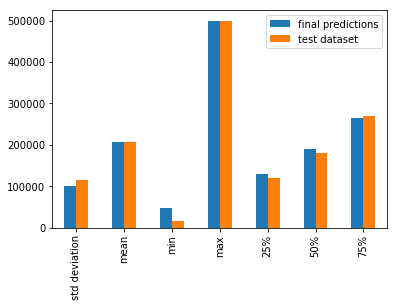

In [154]:
pframe.plot(kind='bar')

> This means that our current prediction for the given house is credible. Therefore we can say that we have a model that fits the data to an extent.